# Data Processing

## Explore data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# import data 
train = pd.read_csv('/kaggle/input/simulates-real-world-agricultural-data/train.csv')
test = pd.read_csv('/kaggle/input/simulates-real-world-agricultural-data/test.csv')
# Display the first few rows of the dataset
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [3]:
# check any null value
print(train.isnull().sum())

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [4]:
# Print the data information
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB
None


There are 10 columns with 750000 rows, without any null values. 'Soli Type', 'Crop Type' and 'Fertilizer Name' are catogory type, others are numeric type.

In [5]:
# Print statistics
print(train.describe())

                  id    Temparature       Humidity       Moisture  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      31.503565      61.038912      45.184147   
std    216506.495284       4.025574       6.647695      11.794594   
min         0.000000      25.000000      50.000000      25.000000   
25%    187499.750000      28.000000      55.000000      35.000000   
50%    374999.500000      32.000000      61.000000      45.000000   
75%    562499.250000      35.000000      67.000000      55.000000   
max    749999.000000      38.000000      72.000000      65.000000   

            Nitrogen      Potassium    Phosphorous  
count  750000.000000  750000.000000  750000.000000  
mean       23.093808       9.478296      21.073227  
std        11.216125       5.765622      12.346831  
min         4.000000       0.000000       0.000000  
25%        13.000000       4.000000      10.000000  
50%        23.000000       9.000000      21.000000  
75%    

Base on the describe, the data range is resonable,so no normalization needed.

## Encode Categorical Variables

In [6]:
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

train['Soil Type'] = le_soil.fit_transform(train['Soil Type'])
train['Crop Type'] = le_crop.fit_transform(train['Crop Type'])
train['Fertilizer Name'] = le_fert.fit_transform(train['Fertilizer Name'])

In [7]:
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,1,8,36,4,5,4
1,1,27,69,65,4,4,30,6,18,4
2,2,29,63,32,4,4,24,12,16,2
3,3,35,62,54,4,0,39,12,4,0
4,4,35,58,43,3,6,37,2,16,5


Check data balance

<Axes: xlabel='Fertilizer Name'>

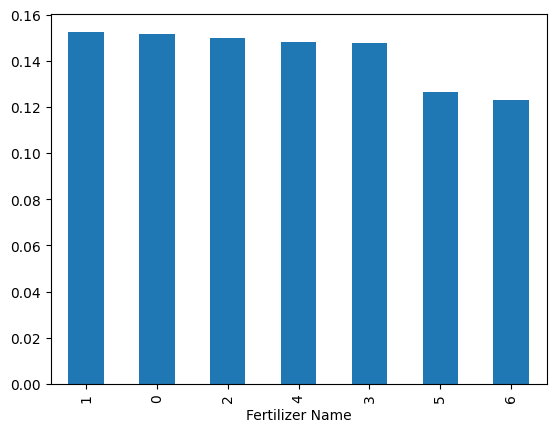

In [8]:
train['Fertilizer Name'].value_counts(normalize=True).plot(kind='bar')

The class distribution for the target variable 'Fertilizer Name' is fairly balanced.

In [9]:
# Separate Features and Target
X = train.drop(columns=['id', 'Fertilizer Name'])
y = train['Fertilizer Name']